#### Importation du fichier excel + transformer la feuille en fichier .csv + rentrer ce csv dans la variable data + afficher les 5 premières lignes du csv : 

In [7]:
# Importation de la base de donnée
import pandas as pd

# Importer le dichier excel
excel_file = "/Users/annac/Desktop/Projet/Anna_pays.xlsx"

# Lire la feuille Excel
df = pd.read_excel(excel_file)

# Chemin du fichier CSV de sortie
Anna_pays = "/Users/annac/Desktop/Projet/Anna_pays.csv"

# Exporter en CSV
df.to_csv(Anna_pays, index=False)

# Lire le CSV
data = pd.read_csv(Anna_pays)

# Afficher les 5 premières lignes
print(data.head)

<bound method NDFrame.head of                                    Country Quality Score  SDGi  \
0                                    Haiti            3A  51.4   
1                                 Honduras            2B  62.8   
2                                  Hungary            2A  78.8   
3                                    India            3A  60.1   
4                                Indonesia            3A  66.3   
5                Iran, Islamic Republic of            2A  70.0   
6                                     Iraq            2A  63.8   
7                                  Ireland            2A  81.0   
8                                   Israel            3A  75.0   
9                                    Italy            3A  78.8   
10                                 Jamaica            3A  69.0   
11                                   Japan            3A  79.8   
12                                  Jordan            3A  70.1   
13                              Kazakhstan    

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

df_subset = df[(df["Country"] >= "Haiti") & (df["Country"] <= "Montenegro")]
len(df_subset)

# Matrice binaire : 1 = NA, 0 = pas NA
na_matrix = df_subset.isna().astype(int).values

# Palette binaire : blanc = 0, rouge = 1
cmap = mcolors.ListedColormap(["white", "red"])

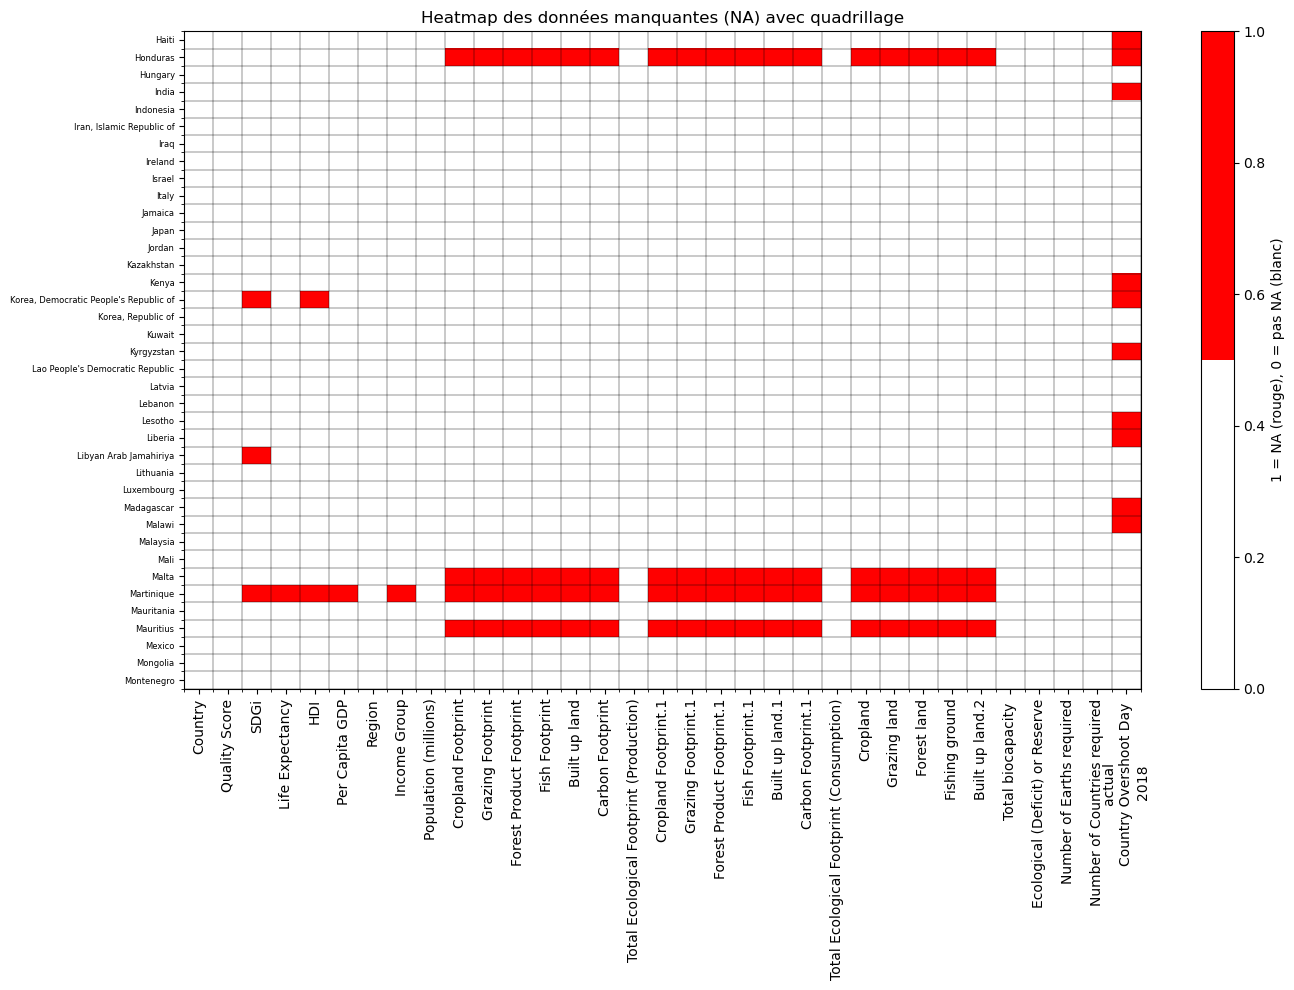

In [13]:
plt.figure(figsize=(14, 10))

# Heatmap
plt.imshow(na_matrix, cmap=cmap, aspect="auto")

# --- Axe X : noms des colonnes ---
plt.xticks(
    ticks=np.arange(len(df.columns)),
    labels=df_subset.columns,
    rotation=90
)

# --- Axe Y : noms des pays ---
plt.yticks(
    ticks=np.arange(len(df_subset)),
    labels=df_subset["Country"],
    fontsize=6
)

# --- Quadrillage ---
plt.grid(color='black', linestyle='-', linewidth=0.3)

# Ajuster le quadrillage pour qu’il s’aligne sur les cellules
plt.gca().set_xticks(np.arange(-0.5, len(df_subset.columns), 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, len(df_subset), 1), minor=True)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.3)
plt.grid(False)  # enlève la grille principale, garde la fine

plt.colorbar(label="1 = NA (rouge), 0 = pas NA (blanc)")
plt.title("Heatmap des données manquantes (NA) avec quadrillage")

plt.tight_layout()
plt.show()

In [14]:
var_x = "Var1"
var_y = "Var2"

plt.figure(figsize=(8,6))
plt.hist2d(df_subset[var_x], df_subset[var_y], bins=20)
plt.colorbar(label="Densité")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title(f"Histogramme 2D — {var_x} vs {var_y}")
plt.show()


KeyError: 'Var1'

<Figure size 800x600 with 0 Axes>